In [2]:
import requests
from pprint import pprint
from PIL import Image
import os
import shutil
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def process_image(input_path):
    #img = cv2.imread(input_path)
    
    #img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    #img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) #cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    #img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    #cv2.imwrite(temp_image_path, img_output) 
    
    with open(input_path, 'rb') as f:
        r = requests.post('http://127.0.0.1:5000/api/v1/segmentation/opticdisk', files = {'file': ('0792_test.tif', f, 'image/tiff', {'Expires': '0'})})
        print(r)    
        if r.status_code != 200:
            raise ValueError("Unexpected result")
            
        outputFileName = r.content
        return outputFileName

In [4]:
def read_gif_by_cv2(pathIn):
    cap = cv2.VideoCapture(pathIn)
    ret, image = cap.read()
    cap.release()
    return image

In [5]:
def load_from_pickle(pathIn):
    ar_file = open(pathIn, "rb")
    res = pickle.load(ar_file)
    ar_file.close()
    return res

In [6]:
def dump_to_pickle(obj, target_path):
    target_file = open(target_path, 'wb')
    pickle.dump(obj, target_file)
    target_file.close()

In [7]:
def compare_images_cv2_fast(cv2image1, cv2image2):
    
    rows1,cols1 = cv2image1.shape
    rows2,cols2 = cv2image2.shape
    
    if rows1 != rows2 or cols1 != cols2:
        print(cv2image1.shape)
        print(cv2image2.shape)
        print(rows1)
        print(rows2)
        print(cols1)
        print(cols2)
        raise ValueError("Images have different size")
        
    cv2image1int = cv2image1.astype(int)
    cv2image2int = cv2image2.astype(int)
    
    all_count = cv2image1int.shape[0] * cv2image1int.shape[1]
    diff = (cv2image1int - cv2image2int)
    diff = np.abs(diff)
    diff_sum = diff.sum() / (255)
    
    equal_count = (np.sign(cv2image1int.astype(int) - cv2image2.astype(int)) == 0).astype(int).sum()
    
    return (equal_count, diff_sum, all_count, equal_count + diff_sum)

In [8]:
input_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/'
expected_result_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/'

In [9]:
output_dir = 'd:/Dane/test_out/'

In [30]:
files = os.listdir(input_dir)
res_map = {}
for file_name in files:
    expected_result_file = file_name
    full_file_name = input_dir + file_name
    expected_result_file = expected_result_file.replace('_training.tif', '_manual1.gif')
    full_expected_result_file = expected_result_dir + expected_result_file
    output_file = process_image(full_file_name)
    res_map[file_name] = (full_file_name, output_file, full_expected_result_file)
    print(res_map[file_name])

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0001_training.tif', b'd:/Fundus/uploads\\6f21de98-40da-4f56-b811-317c54a58aee.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0001_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0002_training.tif', b'd:/Fundus/uploads\\ffee3689-50a4-40df-9dea-0a1449d9db7e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0002_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0003_training.tif', b'd:/Fundus/uploads\\461e1d15-e85a-4c85-bb82-49b1398156a3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0003_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0004_training.tif', b'd:/Fundus/uploads\\88f1c395-05ea-4d73-920c-8d1263dac852.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0033_training.tif', b'd:/Fundus/uploads\\bc68b0cf-9646-43ed-b725-b9fcb513b2a0.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0033_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0034_training.tif', b'd:/Fundus/uploads\\b8af901a-899d-49f5-bc98-8a1fa3136cc5.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0034_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0035_training.tif', b'd:/Fundus/uploads\\c0f91170-e8d8-4b4e-ab41-1f80da8f2d82.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0035_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0036_training.tif', b'd:/Fundus/uploads\\eb9d732e-d56b-4125-b8e6-ef680148fdc6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0065_training.tif', b'd:/Fundus/uploads\\934db741-1f0d-4139-a59a-9799680ae0aa.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0065_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0066_training.tif', b'd:/Fundus/uploads\\3614dba7-0794-421e-a948-3a6e8691682d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0066_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0067_training.tif', b'd:/Fundus/uploads\\9af50dce-8e92-48c5-b58b-074cd2835a27.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0067_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0068_training.tif', b'd:/Fundus/uploads\\bf613954-2394-46fa-b5e9-b448979977cb.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0097_training.tif', b'd:/Fundus/uploads\\d601498d-f2fc-4d18-b090-5c722f3519e9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0097_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0098_training.tif', b'd:/Fundus/uploads\\3f924c3b-b8aa-4ef7-9bd0-3b95ed0f05ac.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0098_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0099_training.tif', b'd:/Fundus/uploads\\cb88176d-72d8-4d19-a07c-cccb8cb068e5.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0099_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0100_training.tif', b'd:/Fundus/uploads\\edbd31eb-d433-4951-a07f-d960d7ab6f95.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0129_training.tif', b'd:/Fundus/uploads\\eaf775f6-734f-4677-805e-0fd45e744ba8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0129_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0130_training.tif', b'd:/Fundus/uploads\\7756f096-0690-4a61-b46e-cd740f656036.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0130_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0131_training.tif', b'd:/Fundus/uploads\\af4c00e8-d6b4-4a81-83da-1317ee1030b8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0131_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0132_training.tif', b'd:/Fundus/uploads\\0e2d271a-57cc-4a1a-9514-ae87d92ae707.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0161_training.tif', b'd:/Fundus/uploads\\2c3502e5-177b-4708-8da8-68907b910eff.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0161_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0162_training.tif', b'd:/Fundus/uploads\\1a50acfe-4e62-435a-aaf5-c8811353bdfa.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0162_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0163_training.tif', b'd:/Fundus/uploads\\7edb10ab-fa3d-4467-a5df-24757753e4f3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0163_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0164_training.tif', b'd:/Fundus/uploads\\f7970ed9-5cef-4d6e-b221-62e1d956f0f6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0193_training.tif', b'd:/Fundus/uploads\\610c85d5-6d4a-4bc2-9297-b5d3faa4f980.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0193_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0194_training.tif', b'd:/Fundus/uploads\\ee5fec57-2e7b-4c4b-97c7-f4803411cea2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0194_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0195_training.tif', b'd:/Fundus/uploads\\fd7d3033-cf8f-42cb-9ddd-33bee7aa92e9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0195_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0196_training.tif', b'd:/Fundus/uploads\\64ee4783-3a01-4e1a-b2e6-c5470ed3aae3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0225_training.tif', b'd:/Fundus/uploads\\eaca7efc-af81-4ee0-8701-42744b064afa.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0225_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0226_training.tif', b'd:/Fundus/uploads\\61d8ef9c-99bf-4d2b-8ad6-9b6044d3064d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0226_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0227_training.tif', b'd:/Fundus/uploads\\d8b2d2f5-e770-491a-b4ec-4d4b0eab2a48.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0227_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0228_training.tif', b'd:/Fundus/uploads\\b8bb124c-7ad8-4ba1-8c5e-5a29f1c3f75d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0257_training.tif', b'd:/Fundus/uploads\\540bdc7b-f648-49a1-bc91-05aa63029699.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0257_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0258_training.tif', b'd:/Fundus/uploads\\e9fff868-5ebd-4402-9eed-c0209ff65ecb.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0258_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0259_training.tif', b'd:/Fundus/uploads\\25e974d1-37bb-423b-ad87-abeb36b76bb6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0259_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0260_training.tif', b'd:/Fundus/uploads\\f3a6e178-3800-42b9-ba37-3f715c8bcabc.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0289_training.tif', b'd:/Fundus/uploads\\bb040d9a-d804-4228-816b-404a6dad9c3b.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0289_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0290_training.tif', b'd:/Fundus/uploads\\05c59d63-b48f-4a06-ac99-0edfdb816b49.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0290_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0291_training.tif', b'd:/Fundus/uploads\\b72c7e09-defb-4d15-ba65-5cb1195af757.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0291_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0292_training.tif', b'd:/Fundus/uploads\\c5156521-136b-4730-888c-c913eff0f0e2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0321_training.tif', b'd:/Fundus/uploads\\f80f247d-f832-431f-a558-7ab7a1298e72.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0321_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0322_training.tif', b'd:/Fundus/uploads\\0acde5c0-cad5-4274-a769-37f51de4b6b9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0322_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0323_training.tif', b'd:/Fundus/uploads\\272ca8c9-2861-4e35-b7ed-c95532590c25.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0323_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0324_training.tif', b'd:/Fundus/uploads\\58799346-9e9a-4fd5-89d4-d8ec1b9e170a.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0353_training.tif', b'd:/Fundus/uploads\\71392275-ecd5-413d-82dc-78e53d8b2ed8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0353_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0354_training.tif', b'd:/Fundus/uploads\\5f59896d-040a-425e-a189-6bf5b4142921.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0354_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0355_training.tif', b'd:/Fundus/uploads\\a5672d85-7c4d-46c3-85fe-bc4a7c59007e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0355_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0356_training.tif', b'd:/Fundus/uploads\\7c414e69-00fc-4365-8016-d37045092d42.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0385_training.tif', b'd:/Fundus/uploads\\717ea524-097c-46c8-8c14-fc205dd16a7c.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0385_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0386_training.tif', b'd:/Fundus/uploads\\15c749dc-decc-4061-ba41-0d20f501a680.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0386_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0387_training.tif', b'd:/Fundus/uploads\\bc28183b-3757-46e9-bcb5-f5d58ea81ca2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0387_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0388_training.tif', b'd:/Fundus/uploads\\2e1528a8-89a3-4508-bd4a-28e758b3954f.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

In [10]:
res_map = load_from_pickle('d:/res_histo_map.pickle')

In [11]:
res_values = [v for v in res_map.values()]

In [12]:
res_values

[('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0001_training.tif',
  b'd:/Fundus/uploads\\6f21de98-40da-4f56-b811-317c54a58aee.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0001_manual1.gif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0002_training.tif',
  b'd:/Fundus/uploads\\ffee3689-50a4-40df-9dea-0a1449d9db7e.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0002_manual1.gif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0003_training.tif',
  b'd:/Fundus/uploads\\461e1d15-e85a-4c85-bb82-49b1398156a3.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0003_manual1.gif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0004_training.tif',
  b'd:/Fundus/uploads\\88f1c395-05ea-4d73-920c-8d1263dac852.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0004_manual1.gif'),
 ('c:/Users/ax/r

In [17]:
all_results = {}
images_cache = {}
all_count = 0

all_results[0] = []
for im in res_values:
    _, pr, ex = im
    ex = ex.replace('_training.tif', '_manual1.gif')
    pr = pr.decode("utf-8")
    #print(ex)
    #print(pr)

    if ex in images_cache:
        exp_img = images_cache[ex]
    else:
        exp_img = read_gif_by_cv2(ex)
        exp_img_gray = cv2.cvtColor(exp_img, cv2.COLOR_BGR2GRAY)
        images_cache[ex] = exp_img_gray

    img = cv2.imread(pr)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret2, img_out = cv2.threshold(img_gray, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #cv2.imwrite("d:/Dane/test_out/gray.tif", img_gray)
    #cv2.imwrite("d:/Dane/test_out/test.tif", img_out)
    #raise ValueError()

    comparison_result = compare_images_cv2_fast(exp_img_gray, img_out)
    all_results[0].append(comparison_result)
    all_count = all_count + 1
    if all_count % 100 == 0:
        print('all count ' + str(all_count))

all count 100
all count 200
all count 300
all count 400


In [18]:
dump_to_pickle(all_results, 'd:/all_otsu_treshold_results.pickle')

In [19]:
all_ratios = []
ixs = []

for k in all_results.keys():
    res = all_results[k]
    correct_sum = 0
    all_sum = 0
    ixs.append(k)
    for t in res:
        correct_sum = t[0]
        all_sum = t[2]
    ratio = correct_sum * 1.0 / all_sum
    all_ratios.append(ratio)

In [20]:
all_ratios

[0.9982785792217238]

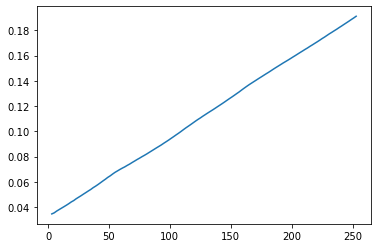

In [51]:
plt.plot(ixs, all_ratios)

In [44]:
filtered_ratios = [all_ratios[ix] for ix in ixs if ix >= 50 and ix <= 150]
filtered_ixs = [ix for ix in ixs if ix >= 50 and ix <= 150]

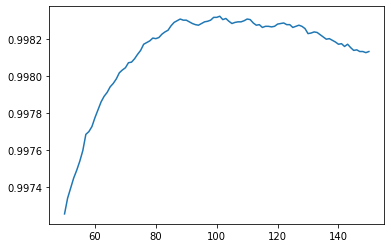

In [45]:
plt.plot(filtered_ixs, filtered_ratios)

In [46]:
np.argmax(all_ratios)

101

In [181]:
img = cv2.imread('c:/Users/ax/retina-unet-master-disc/test/all_predictions.png')
ret_val, img_out = cv2.threshold(img, 98, 255, cv2.THRESH_BINARY)
cv2.imwrite('c:/Users/ax/retina-unet-master-disc/test/all_predictions_bin.png', img_out) 

True

In [47]:
all_ratios[np.argmax(all_ratios)]

0.9983240392774881